In [27]:
import numpy as np
import pandas as pd

from janome.tokenizer import Tokenizer
from gensim.models import Phrases
from wordcloud import WordCloud

import matplotlib.pyplot as plt

In [10]:
df_2021 = pd.read_csv("data/csv/freee/2021.csv")
df_2022 = pd.read_csv("data/csv/freee/2022.csv")

In [11]:
class NotInclude:
    def __init__(self, first=None, second=None, lmin=None):
        self.first = first
        self.second = second
        self.lmin = lmin
        
        self.c1 = lambda x: not self.first or self.first == x
        self.c2 = lambda x: not self.second or self.second == x
        self.c3 = lambda x: not self.lmin or self.lmin <= x

    def include(self, surface, s_token):
        if self.c1(s_token[0]) and self.c2(s_token[1]) and self.c3(len(surface)):
            return False

        return True

conditions = [
    NotInclude(first="助詞"),
    NotInclude(first="記号"),
    NotInclude(second="接尾"),
    NotInclude(first="助動詞"),
    NotInclude(first="動詞", second="自立", lmin=2)
]

def token_condition(surface, s_token):
    return all([c.include(surface, s_token) for c in conditions])

In [12]:
df_2021

,type,date,title
0,プレスリリース,2021-12-23,【国内初】確定申告時のふるさと納税証明書の連携機能を提供開始
1,受賞情報,2021-12-20,freee、ギネス世界記録™を達成！ 「ビデオ上で会計ハングアウトに参加した最多ユーザー数」新記録
2,サービス情報,2021-12-17,給与前払いサービス「Ｑ給」をfreeeアプリストアに掲載開始 勤怠データの自動連携でサービス...
3,イベント,2021-12-16,2月4日(金)「freee Heroes Day」開催決定！ バックオフィス業務に携わるみな...
4,サービス情報,2021-12-16,freee申告、会計事務所向け償却資産申告機能リリースのお知らせ
...,...,...,...
186,その他,2021-01-08,2021年卒のベンチャー企業を志望した学生に調査 べンチャーよりも大企業を選んだ新卒学生は...
187,イベント,2021-01-07,freee、確定申告の基礎知識が1から身につく動画を公開。 税理士登壇の2021年確定申告ウ...
188,イベント,2021-01-07,1月14日、プロダクトマネジメントのためのイベント Around the Product h...
189,サービス情報,2021-01-05,freeeアプリストア 中小企業向けERPパッケージ「アイカタ」掲載開始


In [6]:
df_2021.query("type == 'プレスリリース'")["title"]

0                         【国内初】確定申告時のふるさと納税証明書の連携機能を提供開始
13      サイトビジット社のオンライン学習サービス　資格スクエア、レアジョブグループへの参画完了のお知らせ
18                      freee、アートヴィレッジ大崎セントラルタワーへ本社を拡大移転
36                   2022年1月施行の電子帳簿保存法 改正 freee対応方針のお知らせ
37                   サイトビジット社のオンライン学習サービス 資格スクエア、譲渡のお知らせ
54                  freeeと愛媛銀行がスモールビジネスのIT化推進に向けて業務提携を開始
55                              バーチャルオンリー型での株主総会 開催のお知らせ
58         freeeが出版レーベルをスタート 記念すべき1冊目「ウルトラニッチ」の刊行は10月5日に
65     freeeと住信SBIネット銀行 「freee入出金管理 with 住信SBIネット銀行」提供開始
68                                監査等委員会設置会社への移行に関するお知らせ
73     フィリピンのシステム会社がfreeeグループにジョイン 海外拠点の獲得で開発力を支え、さらな...
77     freeeとGMOあおぞらネット銀行 「freee入出金管理 with GMOあおぞらネット...
88          さらにミッションの実現へ近づくために ビジョンおよびブランドロゴ リニューアルのお知らせ
90     ビジネスカード事業に参入 「 freeeカード Unlimited」β版を2021年秋から提供開始
94           記帳アプリ Taxnote提供の合同会社ノンモ 完全子会社化 および吸収合併のお知らせ
102    （株）リクルートの業務・経営支援サービス 「Air ビジネスツールズ」とfreeeで店舗経営...
114    JSOL とfreeeが金融機関向けサービスで提携 「freee入出金管理」と「FinCas...
125    freeeと百十四銀行が「freee入出金管理 

In [28]:
lst = df_2021.query("type == 'プレスリリース'")["title"].to_list()
lst.extend(df_2022.query("type == 'プレスリリース'")["title"].to_list())

In [38]:
t = Tokenizer()
sentences = []

for i, s in enumerate(lst):
    # print(f"{i:<5}, {s}")
    tokens = t.tokenize(s)
    ss = []
    for token in tokens:
        s_token = token.part_of_speech.split(',')
        if token_condition(token.surface, s_token):
            ss.append(token.surface)
    sentences.append(ss)
len(sentences)

47

In [59]:
# 学習
phrases_bi = Phrases(sentences, min_count=3, threshold=10.0)

# 変換
transformed_bi = phrases_bi[sentences]

words = []
for ts in transformed_bi:
    for w in ts:
        if "_" in w:
            print(w)
        words.append(w.replace("_", ""))
len(words)

提供_開始
業務_提携
ネット_銀行
入_出金
管理_with
ネット_銀行
提供_開始
ネット_銀行
入_出金
管理_with
ネット_銀行
提供_開始
提供_開始
入_出金
入_出金
管理_with
提供_開始
提供_開始
提供_開始
クラ_ウド
クラ_ウド
提供_開始
提供_開始
クラ_ウド
提供_開始
クラ_ウド
提供_開始
業務_提携
クラ_ウド
提供_開始
クラ_ウド
提供_開始
提供_開始
入_出金
提供_開始
入_出金
管理_with
クラ_ウド
業務_提携
業務_提携
提供_開始
入_出金
提供_開始
入_出金
管理_with
提供_開始


510

In [13]:
# t = Tokenizer()
# words = []


# for i, s in enumerate(lst):
#     # print(f"{i:<5}, {s}")
#     tokens = t.tokenize(s)
#     # print([_token.surface for _token in tokens])
#     for token in tokens:
#         s_token = token.part_of_speech.split(',')
#         if token_condition(token.surface, s_token):
#             words.append(token.surface)
#     # print()
# len(words)

556

In [53]:
with open("words.txt", "w") as f:
    for w in words:
        f.write(f"{w}\n")

In [76]:
exclude_words = ["freee", "お知らせ", "提供開始", "サービス"]

def exclude(w):
    for e in exclude_words:
        if e == w:
            return False
    return True

words_space = ' '.join([w for w in words if exclude(w)])

for ex in excludes:
    words_space = words_space.replace(ex, "")
words_space    

'国内 確定 申告 ふるさと 納税 証明 連携 機能 サイトビジット オンライン 学習 資格 スクエア レアジョブグループ 参画 完了 アートヴィレッジ 大崎 セントラルタワー 本社 拡大 移転 2022 1 月 施行 電子 帳簿 保存 改正 対応 方針 サイトビジット オンライン 学習 資格 スクエア 譲渡 愛媛銀行 スモール ビジネス IT 推進 業務提携 開始 バーチャルオンリー 株主 総会 開催 出版 レーベル スタート 記念 す 1 ウルトラ ニッチ 刊行 10 月 5 住 信 SBI ネット銀行 入出金 管理with 住 信 SBI ネット銀行 監査 委員 設置 会社 移行 フィリピン システム 会社 グループ ジョイン 海外 拠点 獲得 開発 さらなる 成長 GMO あ おぞ ネット銀行 入出金 管理with GMO あ おぞ ネット銀行 さらに ミッション 実現 ため ビジョン および ブランド ロゴ リニューアル ビジネス カード 事業 参入 カード Unlimited 版 2021 秋 記帳 アプリ Taxnote 提供 合同 会社 ノンモ 完全 子会社 および 吸収 合併 （株） リクルート 業務 経営 支援 Air ビジネスツールズ 店舗 経営 基盤 構築 実現 JSOL 金融 機関 提携 入出金 管理 FinCast トランザクション 分析 実現 百十四銀行 入出金 管理with 114 BANK 金融 機関 共同 モバイルアプリ 提供 初 サイトビジット 株式 取得 完了 海外 募集 新株 発行 価格 及び 売出 価格 決定 海外 募集 新 株式 発行 及び 株式 海外 売出し NTT 東日本 人事 労務 会計 OEM テレ ワーク 対応 スモール ビジネス 課題 対応 株式会社 サイトビジット 子会社 電子 契約 追 報 調査 結果 不正 アクセス 事実 2 月 10 発表 クラウド お 問い合わせ 管理 システム 第三者 アクセス 可能 クラウド お 問い合わせ 管理 システム 第三者 アクセス 可能 電子 申告 専用 スマホアプリ 書類作成 申告 スマ ホ お うち サクッ 確定 申告 実現 インボイス 制度 対応 し 請求 無料 作成 請求 電子 帳簿 保存 対応 国内 クラウド 会計 ソフト 一体 販売 管理 販売 インボイス 

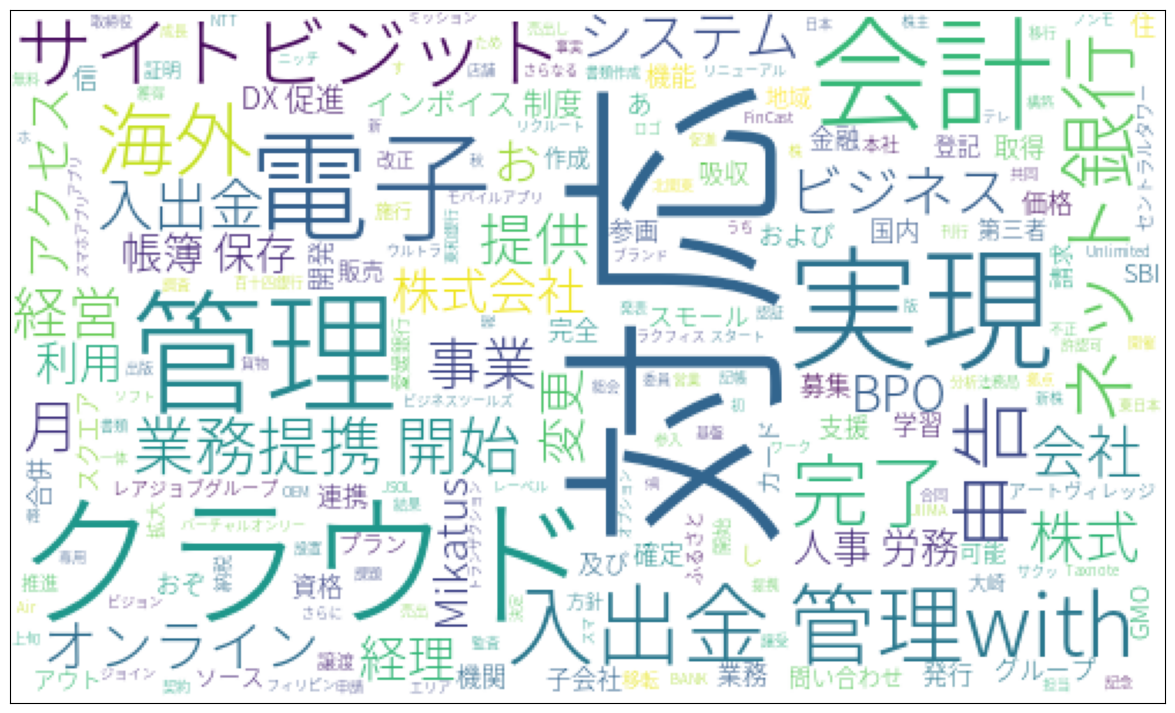

In [77]:
from wordcloud import WordCloud

font_file_path = './NotoSansJP-Light.otf'

wc = WordCloud(background_color="white", font_path=font_file_path, width=500, height=300)
wc.generate(words_space)
plt.figure(figsize=(15, 9))
plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, length=0)
plt.imshow(wc)

In [ ]:
words

['国内',
 '確定',
 '申告',
 'ふるさと',
 '納税',
 '証明',
 '連携',
 '機能',
 '提供',
 '開始',
 'サイトビジット',
 'オンライン',
 '学習',
 'サービス',
 '資格',
 'スクエア',
 'レアジョブグループ',
 '参画',
 '完了',
 'お知らせ',
 'freee',
 'アートヴィレッジ',
 '大崎',
 'セントラルタワー',
 '本社',
 '拡大',
 '移転',
 '2022',
 '1',
 '月',
 '施行',
 '電子',
 '帳簿',
 '保存',
 '改正',
 'freee',
 '対応',
 '方針',
 'お知らせ',
 'サイトビジット',
 'オンライン',
 '学習',
 'サービス',
 '資格',
 'スクエア',
 '譲渡',
 'お知らせ',
 'freee',
 '愛媛銀行',
 'スモール',
 'ビジネス',
 'IT',
 '推進',
 '業務',
 '提携',
 '開始',
 'バーチャルオンリー',
 '株主',
 '総会',
 '開催',
 'お知らせ',
 'freee',
 '出版',
 'レーベル',
 'スタート',
 '記念',
 'す',
 '1',
 'ウルトラ',
 'ニッチ',
 '刊行',
 '10',
 '月',
 '5',
 'freee',
 '住',
 '信',
 'SBI',
 'ネット',
 '銀行',
 'freee',
 '入',
 '出金',
 '管理',
 'with',
 '住',
 '信',
 'SBI',
 'ネット',
 '銀行',
 '提供',
 '開始',
 '監査',
 '委員',
 '設置',
 '会社',
 '移行',
 'お知らせ',
 'フィリピン',
 'システム',
 '会社',
 'freee',
 'グループ',
 'ジョイン',
 '海外',
 '拠点',
 '獲得',
 '開発',
 'さらなる',
 '成長',
 'freee',
 'GMO',
 'あ',
 'おぞ',
 'ネット',
 '銀行',
 'freee',
 '入',
 '出金',
 '管理',
 'with',
 'GMO',
 'あ',
 'おぞ',
 'ネット',
 '銀行',
 '提供'